# Training a neural network for XOR using ES(1+1) with 1/5 rule
- 9 weight values to optimize
- Use sigmod activation function for all neurons
- Not generalized for N hidden layers with M neurons for each hidden Layer
- CJ Chung 2022-

### HW3 Assignment Disclaimer
*	Author Name: V Harsha Yellela
*	LTU ID: 000798754
*	Work Ownership: This work is my own. It is not copied from classmates (Yes/No): Yes
*	AI Assistance: Percentage of code generated with AI tools
(If greater than 0%, briefly describe how AI was used): 10%
*	Understanding: I understand every part of this code (Yes/No):  Yes
*	Confidence: I am confident that I can modify, adapt, and extend this code on my own (Yes/No): Yes

<image src=https://www.robofest.net/DL/XOR_sigmoid.png width=300>

In [13]:
import numpy as np
from math import exp, tanh
from random import random, gauss
import matplotlib.pyplot as plt

In [14]:
def sigmoid(ws):
  return 1.0 / (1.0 + exp(-1.0*ws))

def stairStep(ws):
  if ws > 0:
    return 1.0
  else:
    return 0

def relu(ws):
  return max(0.0, ws)

def tanh(ws):
  return (exp(ws) - exp(-ws)) / (exp(ws) + exp(-ws))

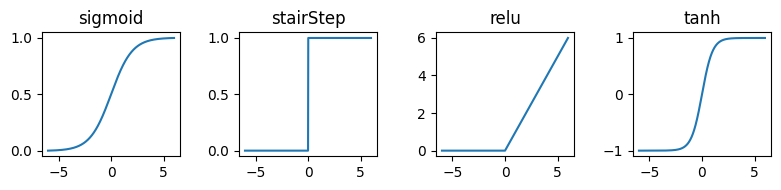

In [15]:
x = np.arange(-6, 6, 0.01) # Grid of 0.01 spacing from -pi to pi
act_fucs = (sigmoid, stairStep, relu, tanh)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, len(act_fucs), figsize=(8, 2)) # 1 row, 4 columns, smaller figure size

# Plot each activation function in a subplot
for i, act_fuc in enumerate(act_fucs):
  y = [act_fuc(val) for val in x] # List comprehension
  axes[i].plot(x, y)
  axes[i].set_title(act_fuc.__name__) # Set title to function name

plt.tight_layout() # Adjust layout to prevent titles overlapping
plt.show()

In [16]:
# inputs are       a, b, 1 (bias)
input = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]], dtype=float)
desired_out = np.array([0, 1, 1, 0], float)
hidden = np.array([0, 0], float) # to store output of each hidden neuron
test_input = np.array([[0.01, 0, 1],
                      [0, 0.95, 1],
                      [1, 0.05, 1],
                      [0.9, 1, 1]], dtype=float)

In [17]:
# feed forward propagation
def ffp(w, input_arr, i, activation_f): #One hidden layer Feed Forward, i = sample pattern index
  #w = np.array([-0.22086193, -0.02440471,  0.87562968,  1.00092766,  0.17625851,  0.03070678, 1.61655582, -0.7638391,   1.09391015])
  m = 0 #index for 9 weights
  for j in range(len(hidden)):
    hidden[j] = 0.0
    for k in range(3):
    # ---------- complete the missing lines below ------------------------------
        hidden[j] += w[m] * input_arr[i][k]
        m += 1
    hidden[j] = activation_f(hidden[j])

  NN_output = 0.0
  # Add the bias weight for the output neuron
  NN_output += w[m] * 1.0
  m += 1
  for j in range(len(hidden)):
      NN_output += w[m] * hidden[j]
      m += 1

  NN_output = activation_f(NN_output)
  return NN_output

def objFunc(x, input_arr, act_fn):
  errSum = 0.0
  for i in range(4):
  # ---------- complete the missing lines below --------------------------------
    y = ffp(x, input_arr, i, act_fn)
    err = (desired_out[i] - y) ** 2
    errSum += err

  return errSum

In [18]:
def verify(w, act_fn):
  print('\t***** To verify if the w vector above is correct *****')
  for i in range(4):
    y = ffp(w, test_input, i, act_fn)
    # Iterate through input elements for printing
    input_str = ' '.join([f'{x:.2f}' for x in test_input[i]])
    print(f'\t   Test Input: [{input_str}] \tOutput: {y:.1f}')

w1 = np.array([1.7299660387120122, 3.04021437773799, -1.20526745645984, -1.6385111908431627, -2.578129126967211, 3.0036521877830995, 2.505440178023749, 2.5067862885975645, -0.40169355047449445]) # from tanh
w2 = np.array([1.0, 1.0, -0.5, -1.0, -1.0, 1.5, 1.0, 1.0, -1.5]) # works with stairStep
w3 = np.array([15.777498706166504, -13.170463800361835, 6.928145681894125, -9.78751875599886, 15.038835851148951, 8.05298888101147, -11.903670377654652, -14.490754747951865, 19.817246873788978])
verify(w1, tanh)
verify(w2, stairStep)
verify(w3, sigmoid)

	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 1.0
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 1.0
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 0.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


In [19]:
def es_1115 (numVar, low, high, maxGen, windowSize, stepSize, act_fn, input, desired_out):
  p = np.zeros(numVar)
  o = np.zeros(numVar)
  #mut_list = np.array([])
  sucessCnt = 0

  # Initialize parent solution
  for j in range(numVar):
    p[j] = low + random() * (high-low)
  parentVal = objFunc(p, input, act_fn)

  for gen in range(1, maxGen+1):
    if gen % windowSize == 0: #update step size
      if sucessCnt > windowSize * 0.2:
        stepSize /= 0.82 #increase
      elif sucessCnt < windowSize * 0.2:
        stepSize *= 0.82 #decrease
      sucessCnt = 0

    # Reproduce (create child)
    for j in range(numVar):
      o[j] = p[j] + gauss(0.0, stepSize)
      o[j] = np.clip(o[j], low, high)

    # Evaluate child
    childVal = objFunc(o, input, act_fn)

    # Selection
    if childVal < parentVal:
      #Child becomes a parent for next generation
      for j in range(numVar):
        p[j] = o[j]
      parentVal = childVal
      sucessCnt+=1

    if gen > 1000 and parentVal > 1.0:
      return p, parentVal, gen, False # No hope

    if parentVal < 0.00005:
      return p, parentVal, gen, True # Acceptable solution found

  return p, parentVal, maxGen, False # Reached max generations

In [20]:
totGen = 0
foundCnt = 0
maxGen = 20000
maxTrial = 25

numVar = 9
act_fn = sigmoid # Keras could not find the optimized NN with sigmoid
low = -20.0 # -5 and 5 did not work
high = 20.0

#for 1/5 rule
windowSize = 50 # When 30, 14%; 40-16%, 50-22%
stepSize = 0.82

for trial in range(1, maxTrial+1):
  # Seed the random number generator with the current system time for each trial
  # np.random.seed(int(time.time())) No need. If the seed() function is not explicitly
  # called, the default seed value is derived from the current system time.

  best_solution, best_error, generations, success = es_1115 (
      numVar, low, high, maxGen, windowSize, stepSize, act_fn, input, desired_out
  )

  if success:
    print(f'Trial = {trial}, Acceptable solution found at generation {generations}')
    for j in range(numVar):
      print(f"\t w[{j}]: {best_solution[j]}")
    print(f"\tSSE = {best_error}")

    verify(best_solution, act_fn)
    totGen += generations
    foundCnt += 1
  elif generations == 1001:
    print(f'Trial = {trial},\t{best_error}\t Terminated, since no hope')
  elif generations == maxGen:
    print(f'Trial = {trial},\t{best_error}')
print(f'System Success: {foundCnt*100/maxTrial:.1f}%')

Trial = 1,	0.5000292742343954
Trial = 2,	0.6666926825217449
Trial = 3, Acceptable solution found at generation 257
	 w[0]: -9.058044124256005
	 w[1]: -16.5557104303334
	 w[2]: 5.053552252692744
	 w[3]: 6.632810127313512
	 w[4]: 11.146711421563877
	 w[5]: -16.280114927394376
	 w[6]: 5.772550815122864
	 w[7]: -11.338519405223183
	 w[8]: -14.876311986341959
	SSE = 4.5484087474827464e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0
Trial = 4,	0.666703352853609
Trial = 5,	0.6668780264996198
Trial = 6, Acceptable solution found at generation 497
	 w[0]: 12.721056001519317
	 w[1]: -6.7500720440856465
	 w[2]: -10.905558772630265
	 w[3]: -17.71730907783323
	 w[4]: 8.057592125518603
	 w[5]: -4.063908534844102
	 w[6]: -5.75802061169498
	 w[7]: 13.630852781137653
	 w[8]: 11.477047394066613
	SSE = 4.9368748